In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [65]:
df=pd.read_csv('heart.csv')

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
df['fbs'].unique()

array([1, 0], dtype=int64)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [68]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='target', ylabel='count'>

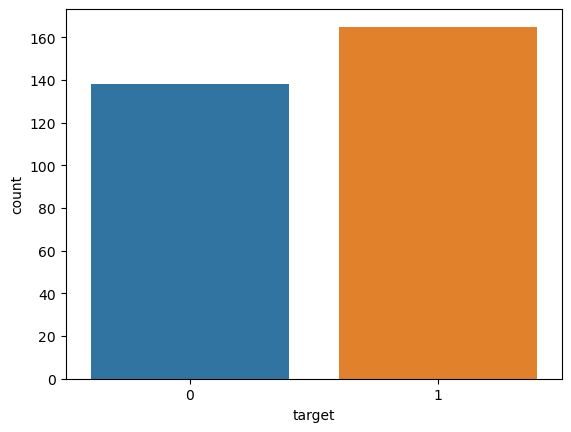

In [69]:
sns.countplot(data=df,x='target')

<Axes: xlabel='target', ylabel='age'>

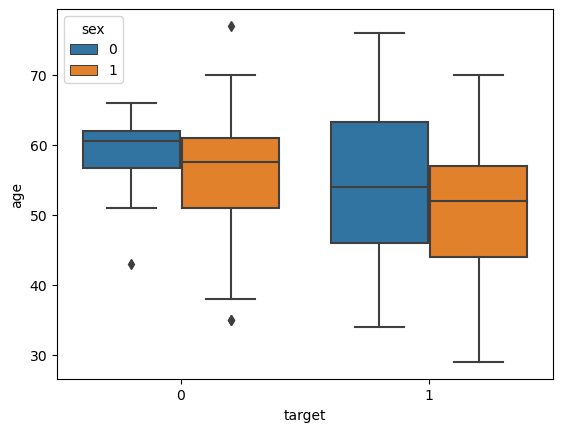

In [70]:
sns.boxplot(data=df,x='target',y='age',hue='sex')

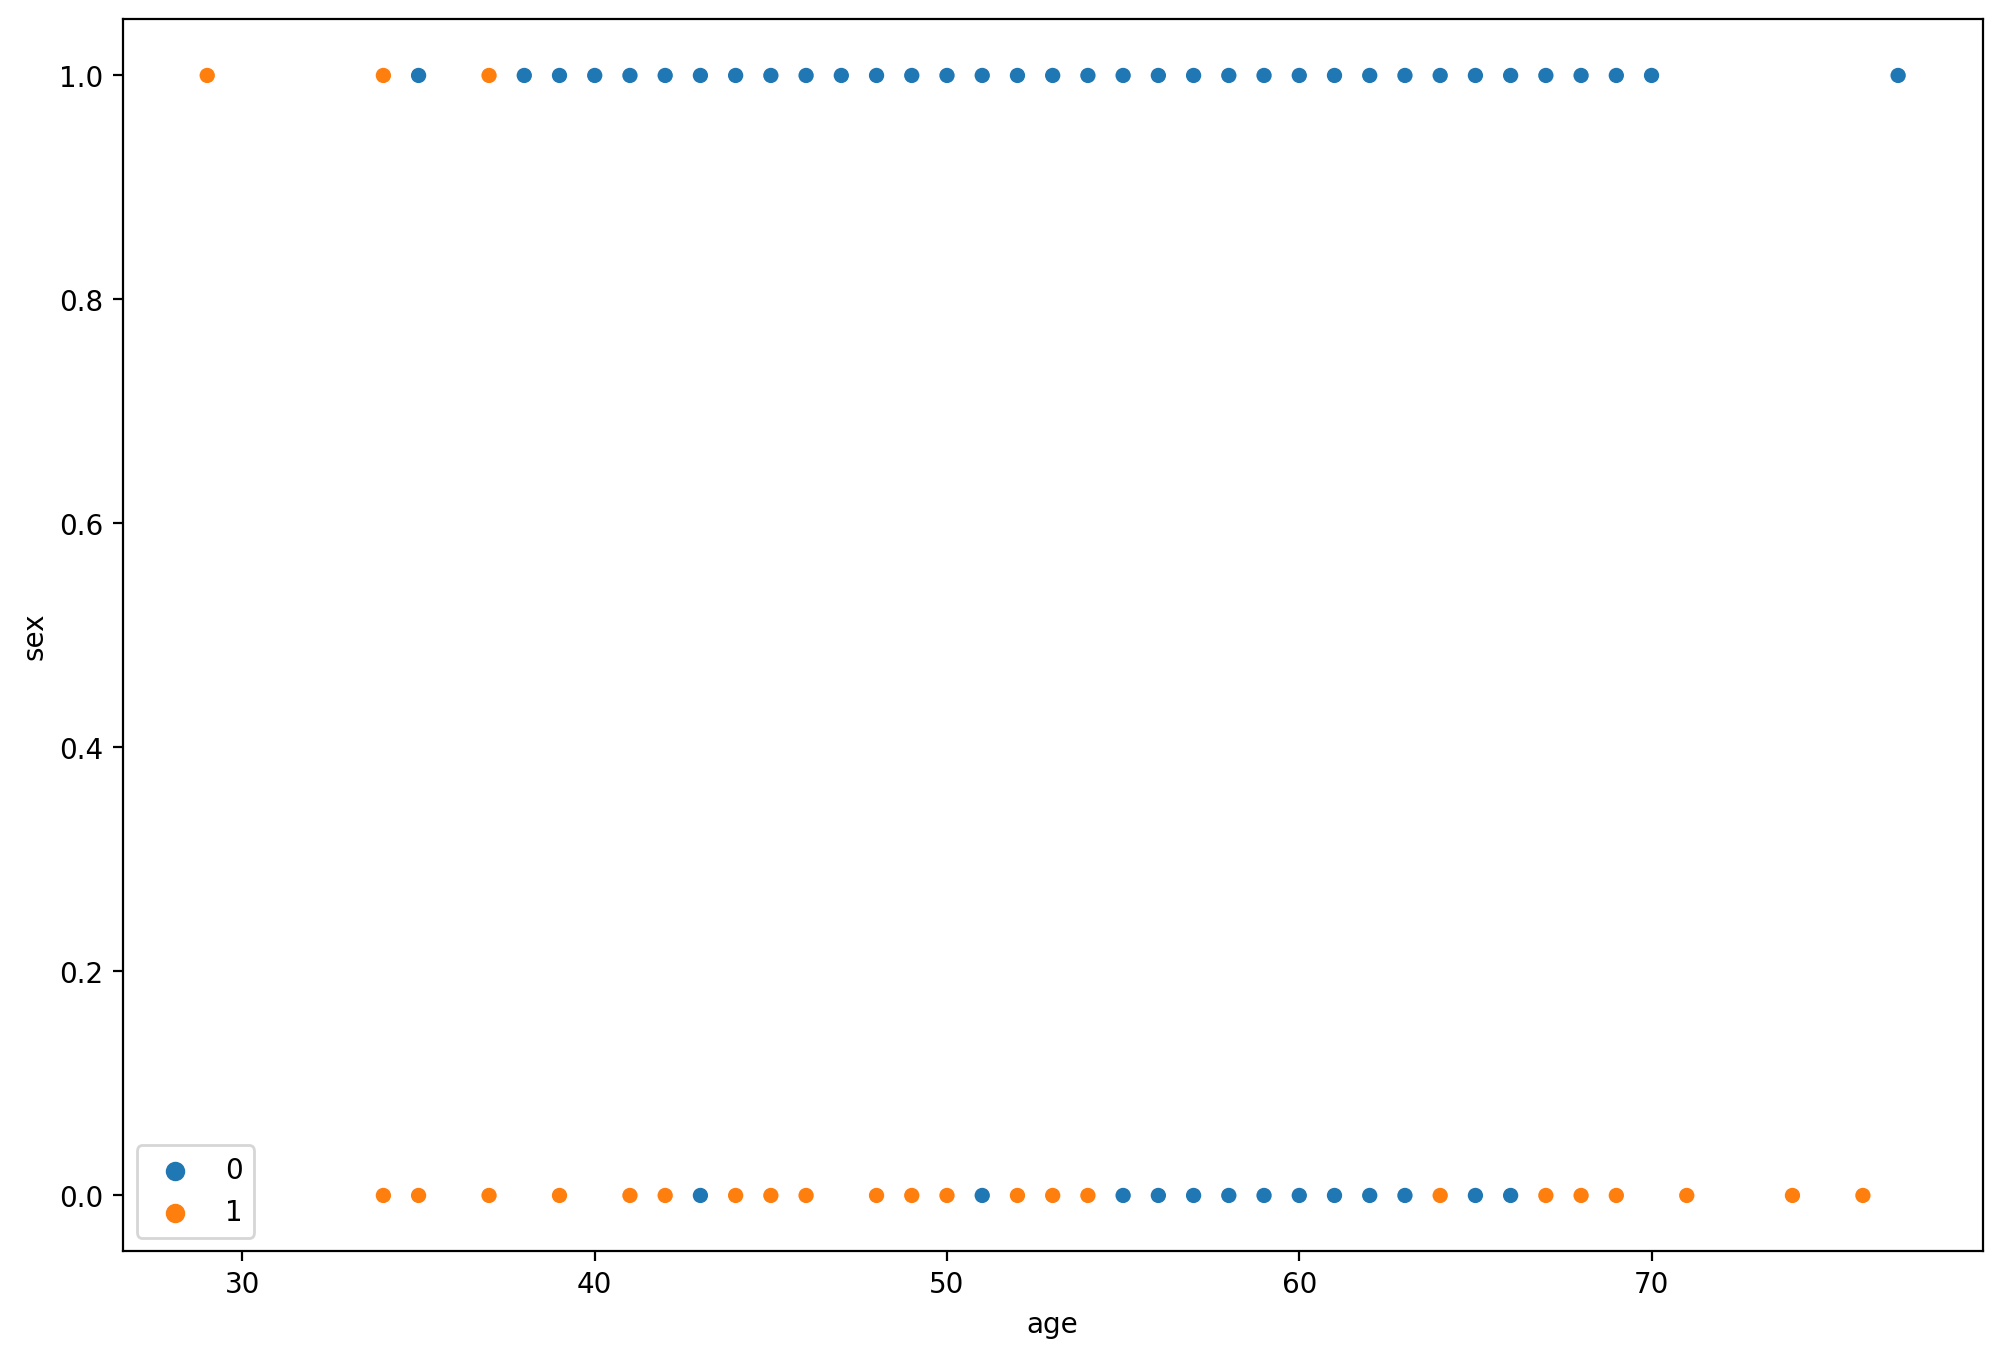

In [71]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df,x='age',y='sex',hue='target')
plt.legend(loc='best')

In [72]:
x=df.drop('target',axis=1)
y=df['target']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [74]:
sc=StandardScaler()

In [75]:
X_train=sc.fit_transform(X_train)

In [76]:
X_test=sc.transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log_model=LogisticRegression(solver='newton-cg',multi_class='auto')

In [79]:
log_model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [80]:
y_pred=log_model.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred)

0.81

In [82]:
recall_score(y_test,y_pred)

0.8275862068965517

In [83]:
precision_score(y_test,y_pred)

0.8421052631578947

In [84]:
penalty=['l1','l2','elasticnet']
c=np.logspace(0,10,20)
l1_ratio=np.linspace(0,10,20)
pg={'penalty':penalty,'l1_ratio':l1_ratio,'C':c}

In [85]:
gn=GridSearchCV(estimator=log_model,param_grid=pg,verbose=1)

In [86]:
gn.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib

GridSearchCV(estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [87]:
gn.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [88]:
gn.best_score_

0.8473170731707317

In [89]:
gn.best_estimator_

LogisticRegression(C=3.3598182862837818, l1_ratio=0.0, solver='newton-cg')

In [90]:
y_gn_pred=gn.predict(X_test)

In [91]:
accuracy_score(y_test,y_gn_pred)

0.81

In [92]:
from sklearn.metrics import precision_score,precision_recall_curve,recall_score

In [93]:
precision_score(y_test,y_gn_pred)

0.8421052631578947

In [94]:
print(classification_report(y_test,y_gn_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        42
           1       0.84      0.83      0.83        58

    accuracy                           0.81       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [95]:
confusion_matrix(y_test,y_gn_pred)

array([[33,  9],
       [10, 48]], dtype=int64)

In [96]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [97]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [98]:
from joblib import dump,load

In [99]:
dump(gn,'Heartpred')

['Heartpred']

In [100]:
loaded_model=load('heartpred')

In [122]:
loaded_model.predict_proba([[40,0,1,76,235,1,1,152,1,2.4,0,0,2]])

array([[7.14983628e-14, 1.00000000e+00]])

In [123]:
loaded_model.predict([[40,0,1,76,235,1,1,152,1,2.4,0,0,2]])

array([1], dtype=int64)